In [1]:
%run 'data_preparation.ipynb'

In [2]:
%run 'time_series_anylysis.ipynb'

In [3]:
from pandas.tools.plotting import autocorrelation_plot
from matplotlib.pylab import rcParams
import math
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler

from dateutil import parser


/home/jawahar/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



# Seasonality and trend

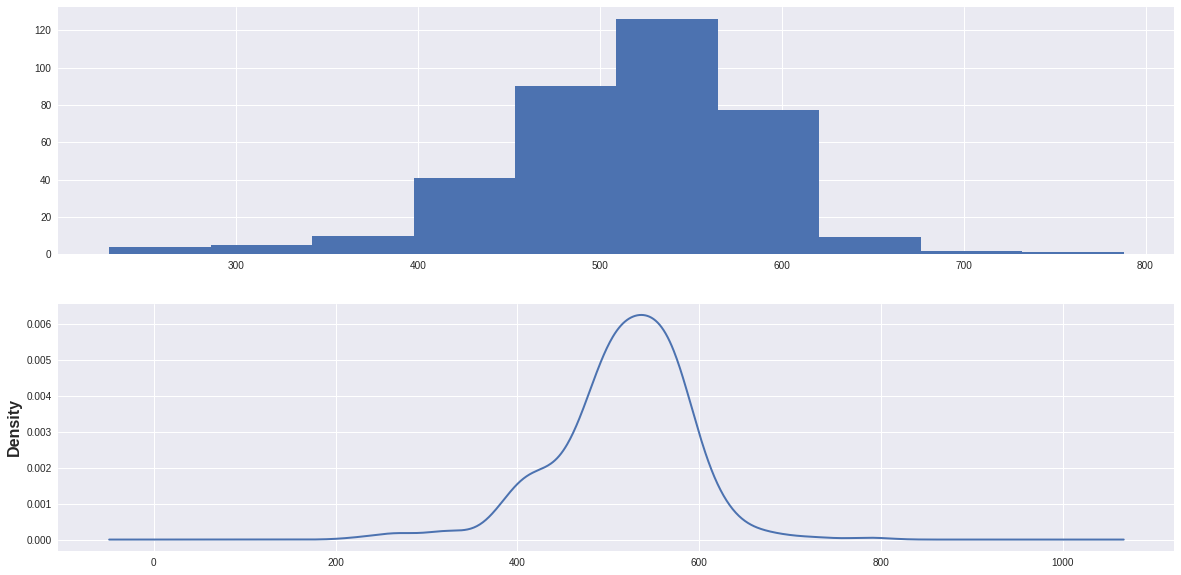

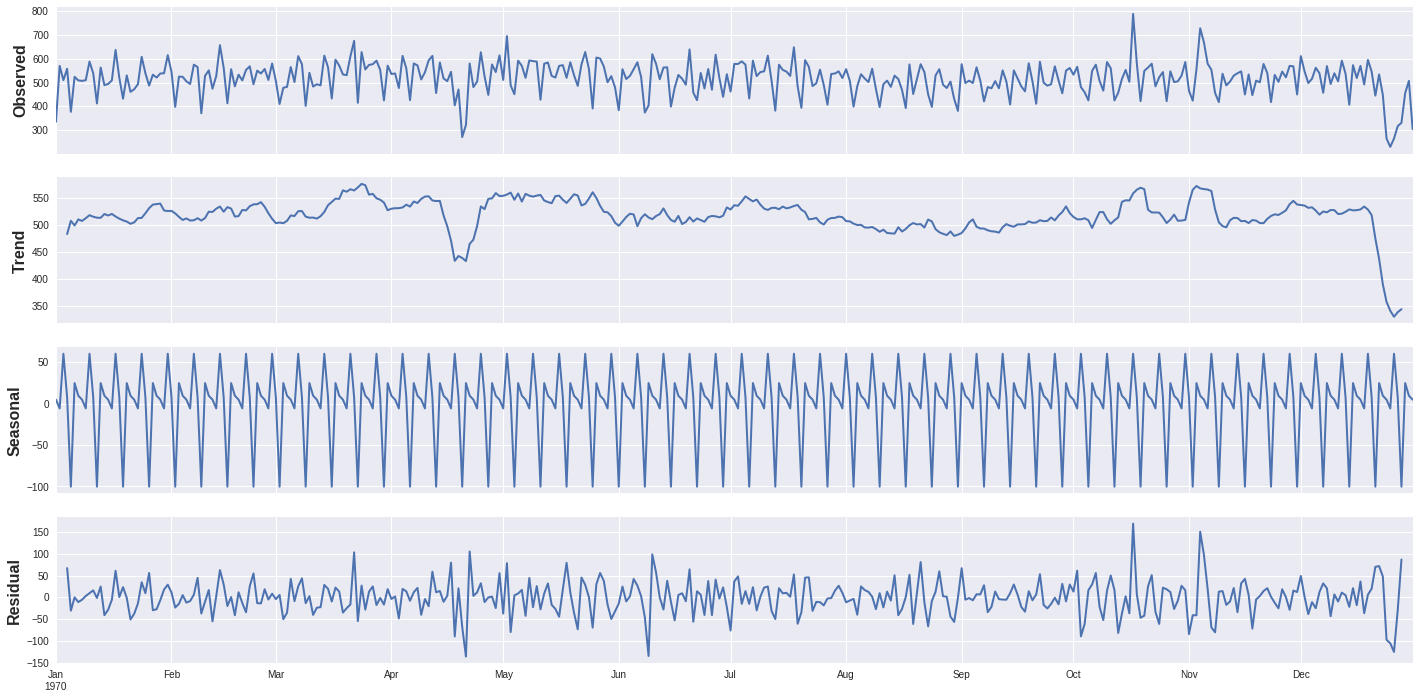

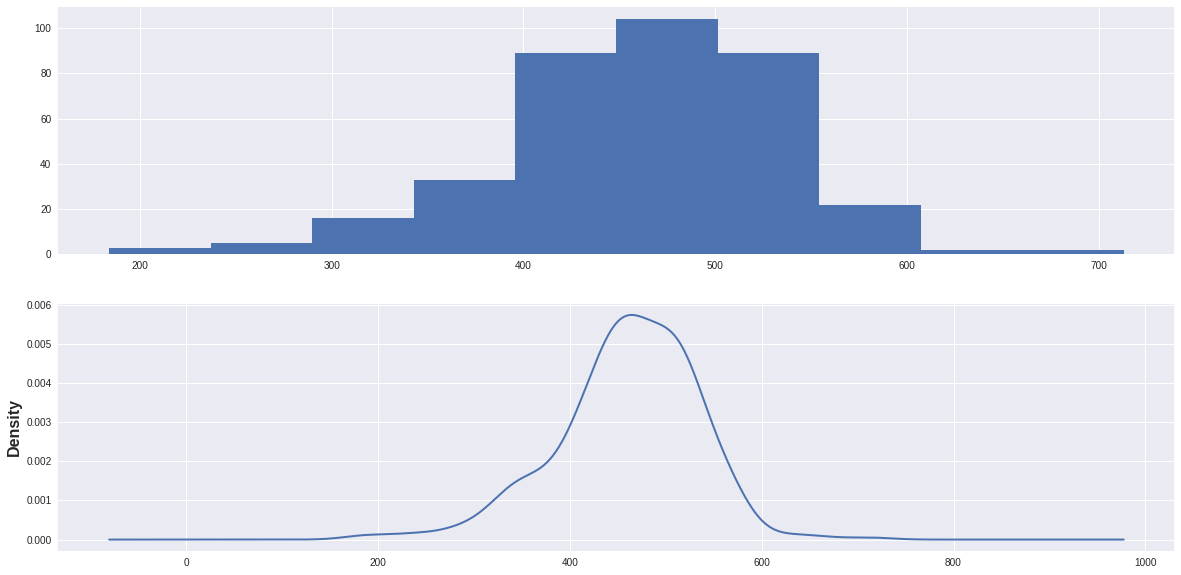

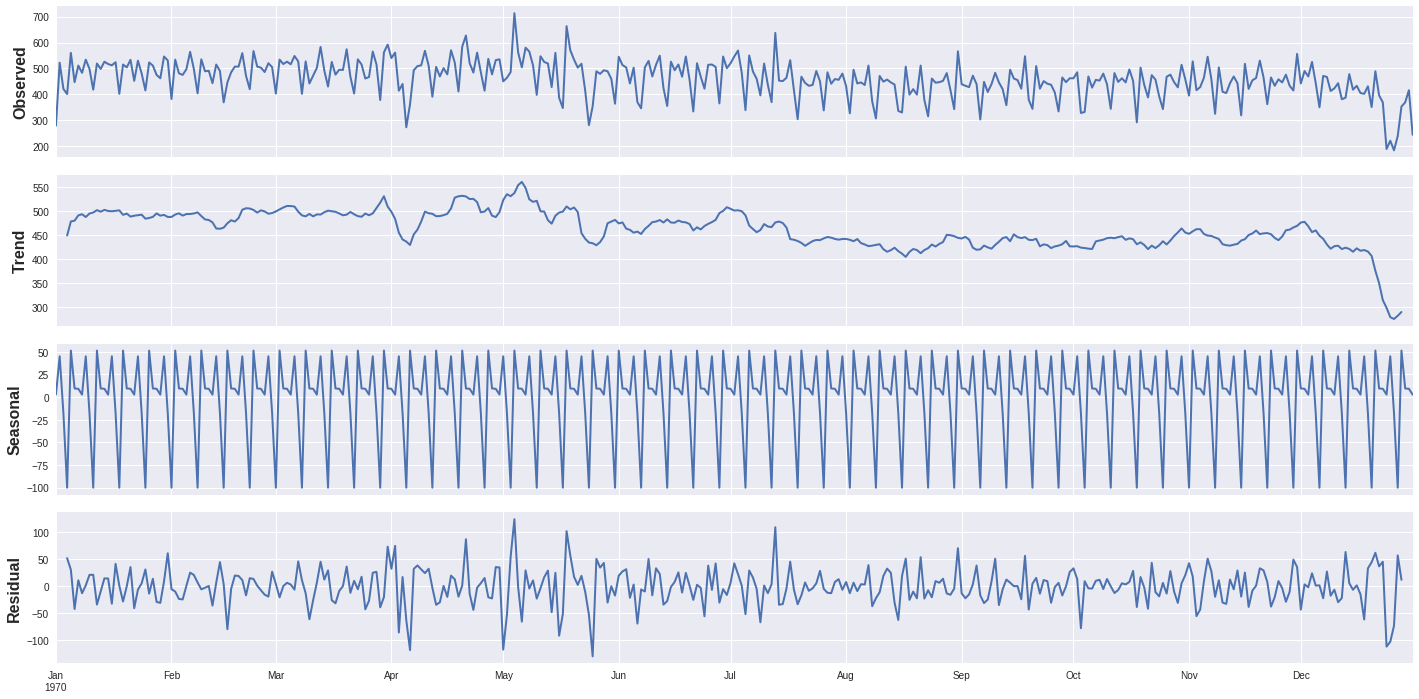

In [4]:
y2014 = per_day2014['BOOKING_HAL_ID'].astype('float32')
y2015 = per_day2015['BOOKING_HAL_ID'].astype('float32')

for var in [y2014,y2015]:
    plt.rcParams["figure.figsize"] = (20,10)
    
    plt.figure(1)
    plt.subplot(211)
    var.hist()
    plt.subplot(212)
    var.plot(kind='kde')
    plt.show()
    var = pd.DataFrame(var)
    var.index = pd.DatetimeIndex(freq='d', start = 0, periods = 365)
    decomp = seasonal_decompose(var, model='additive')
    decomp.plot()
    
    plt.show()

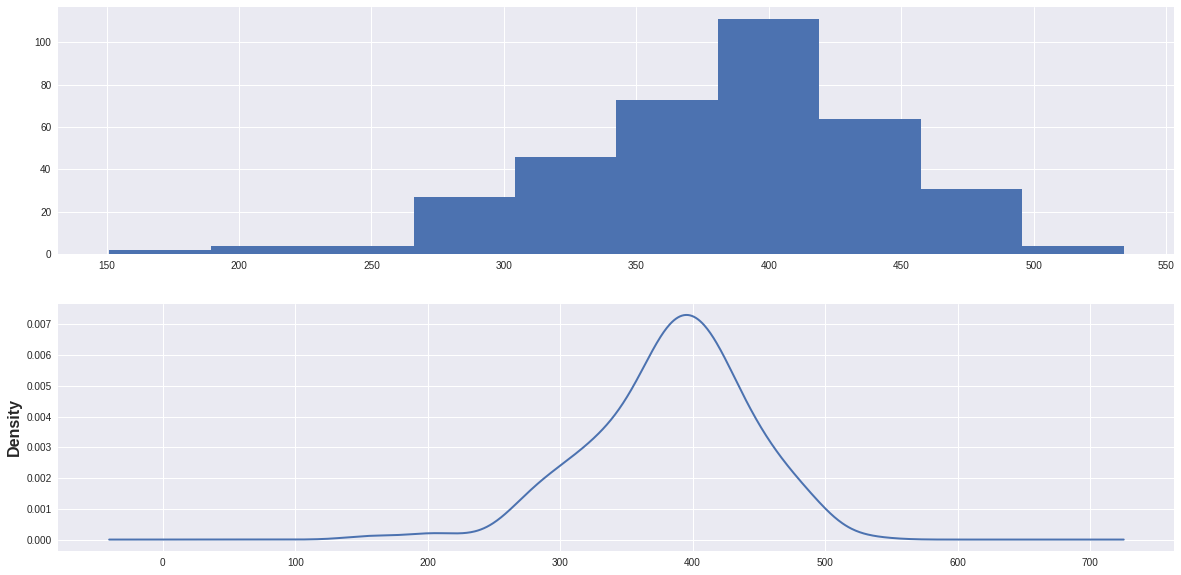

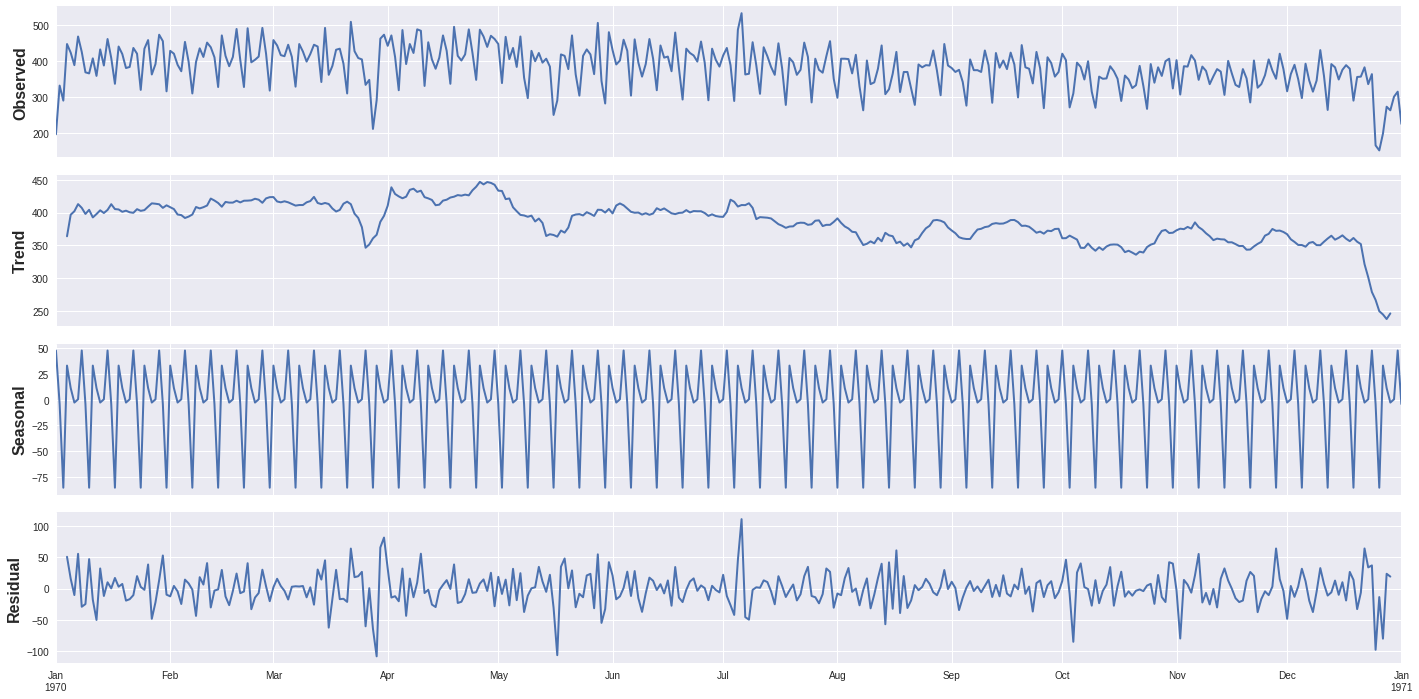

In [5]:
y2016 = per_day2016['BOOKING_HAL_ID'].astype('float32')

for var in [y2016]:
    plt.rcParams["figure.figsize"] = (20,10)
    
    plt.figure(1)
    plt.subplot(211)
    var.hist()
    plt.subplot(212)
    var.plot(kind='kde')
    plt.show()
    var16 = pd.DataFrame(var)
    var16.index = pd.DatetimeIndex(freq='d', start = 0, periods = 366)
    decomp = seasonal_decompose(var16, model='additive')
    decomp.plot()
    
    plt.show()

# Dickey-Fuller test to check stationarity


In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
def adf_check(per_day):
    result = adfuller(per_day)
    print(' Augmented Dicky-Fuller Test')
    labels = ['ADF Test Statistic', 'p-value','# of lags','Num of Observations used']
    
    for value, label in zip(result,labels):
        print(label+ ' : '+str(value))
    
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis')
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('weak evidence against null hypothesis')
        print('Fail to rejct null hypothesis')
        print('Data has a unit root, it is non -stationary')

In [8]:
adf_check(per_day['BOOKING_HAL_ID'])

 Augmented Dicky-Fuller Test
ADF Test Statistic : -1.2005248563537765
p-value : 0.6733698912369828
# of lags : 21
Num of Observations used : 1074
weak evidence against null hypothesis
Fail to rejct null hypothesis
Data has a unit root, it is non -stationary


In [9]:
per_day['First Difference'] = per_day['BOOKING_HAL_ID'] - per_day['BOOKING_HAL_ID'].shift(1)

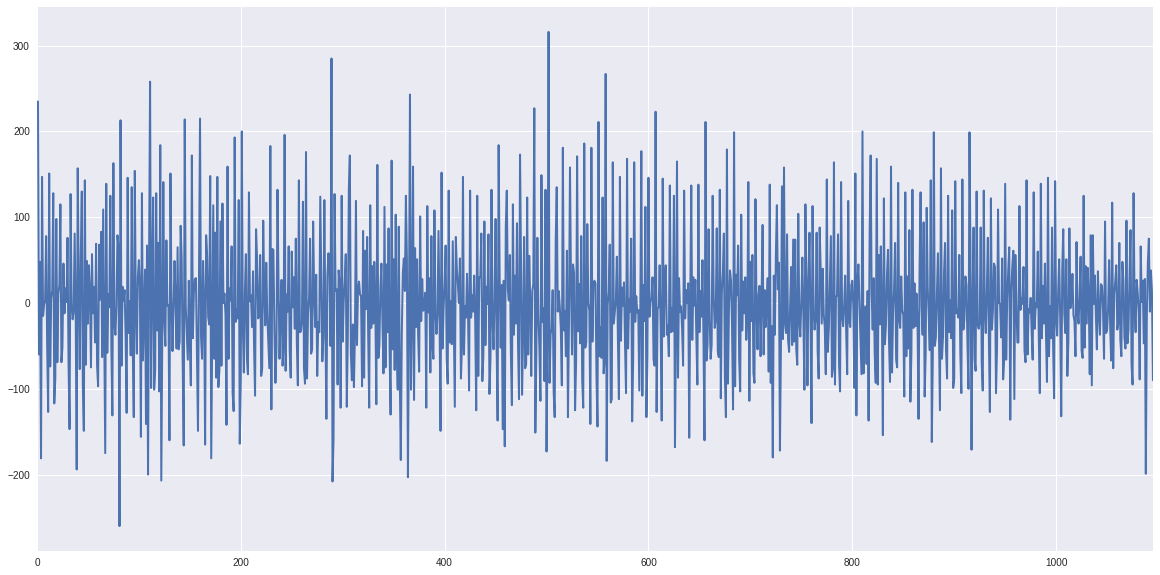

In [10]:
per_day['First Difference'].plot()

In [11]:
adf_check(per_day['First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -10.067910457000123
p-value : 1.281656570421125e-17
# of lags : 20
Num of Observations used : 1074
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [12]:
per_day['Seasonal First Difference'] = per_day['BOOKING_HAL_ID'] - per_day['BOOKING_HAL_ID'].shift(7)

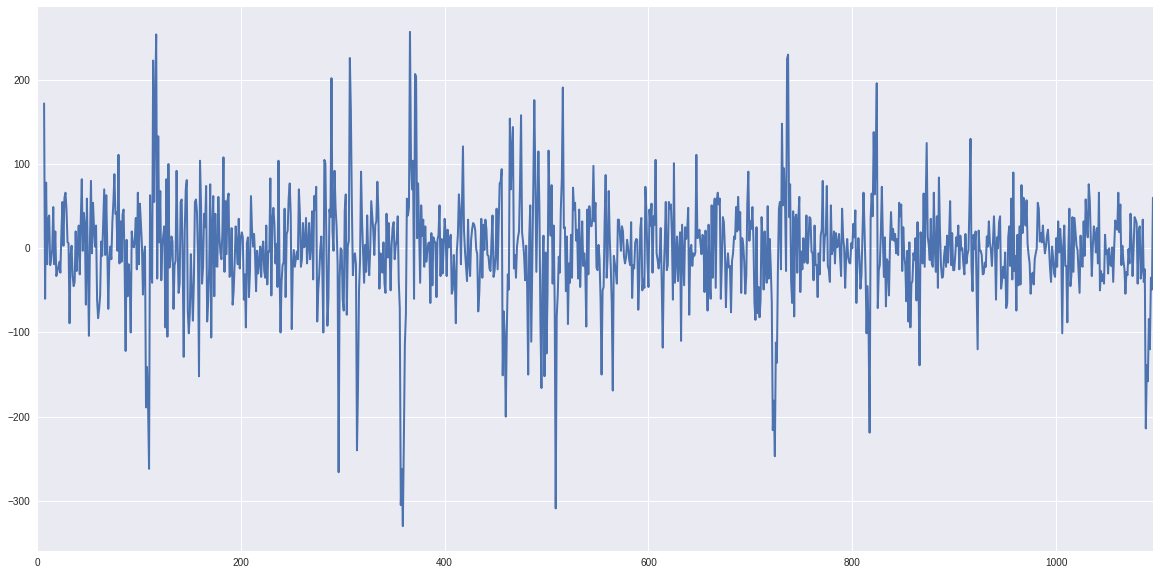

In [13]:
per_day['Seasonal First Difference'].plot()

In [14]:
adf_check(per_day['Seasonal First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -8.71282722117961
p-value : 3.552970701924573e-14
# of lags : 21
Num of Observations used : 1067
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


# Rolling Mean and Standard Deviation

/home/jawahar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()

/home/jawahar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()



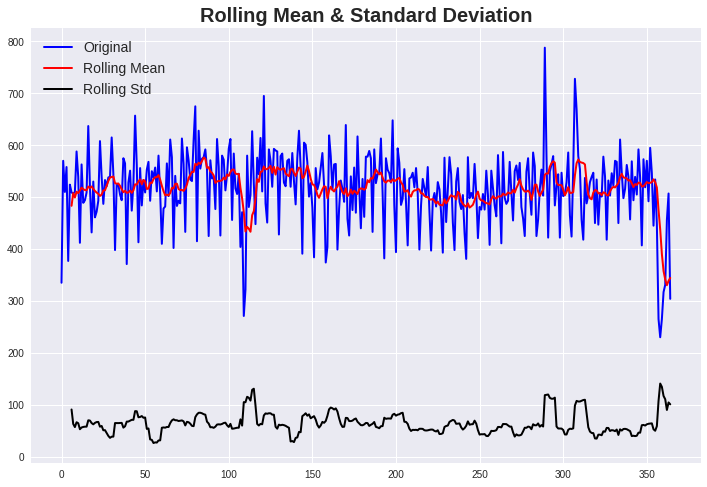

In [15]:
#Determing rolling statistics
rolmean = pd.rolling_mean(y2014, window=7)
rolstd = pd.rolling_std(y2014, window=7)

#Plot rolling statistics:
fig = plt.figure(figsize=(12, 8))
orig = plt.plot(y2014, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [16]:
#dates = per_day2014['BOOKING_DATE'].tolist()
#y2014 = per_day2014['BOOKING_HAL_ID'].astype('float32')
#y2014.index = pd.DatetimeIndex(freq='d', start = dates[0], periods = 365)
#y2015 = per_day2015['BOOKING_HAL_ID'].astype('float32')
#y2015.index = pd.DatetimeIndex(freq='d', start = dates[0], periods = 365)
#y2016 = per_day2016['BOOKING_HAL_ID'].astype('float32')
#y2016.index = pd.DatetimeIndex(freq='d', start = dates[0], periods = 366)

# No of bookings

In [17]:
#y2014['first_difference'] = y2014['BOOKING_HAL_ID'] - y2014['BOOKING_HAL_ID'].shift(1)
#test_stationarity(qs['first_difference'].dropna(inplace = False))

# Autocorrelation and Partial Autocorrelation

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

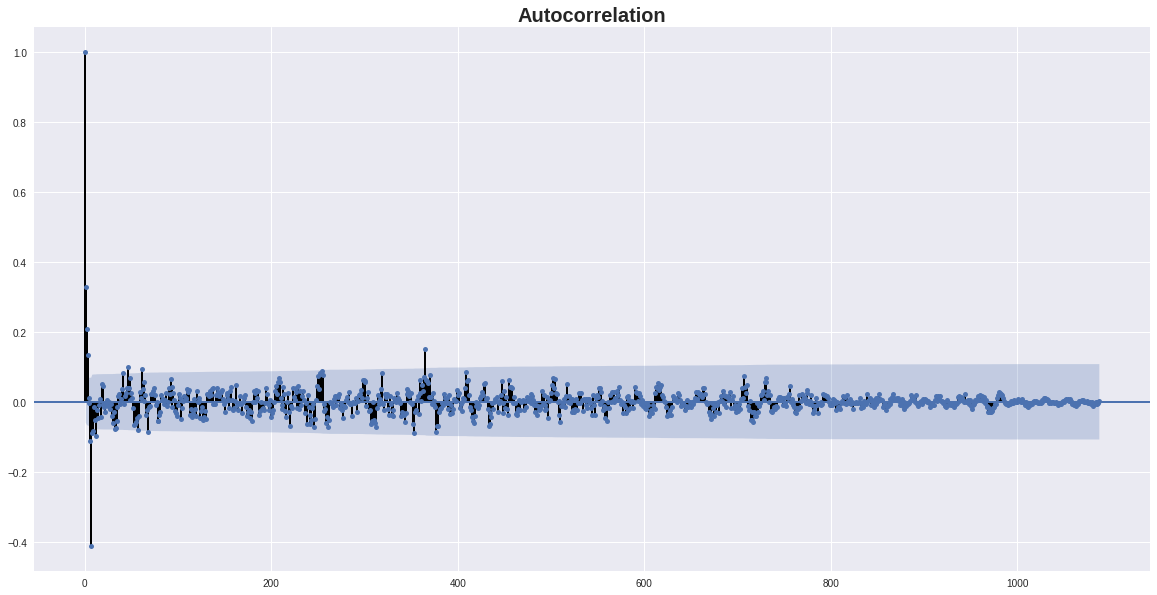

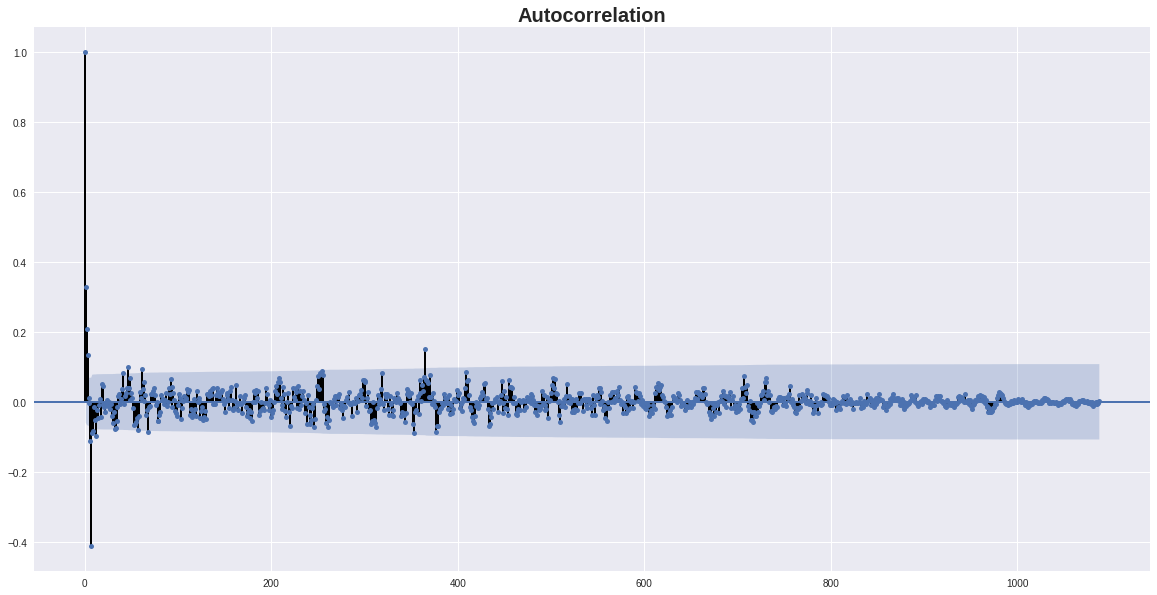

In [19]:
plot_acf(per_day['Seasonal First Difference'].dropna())

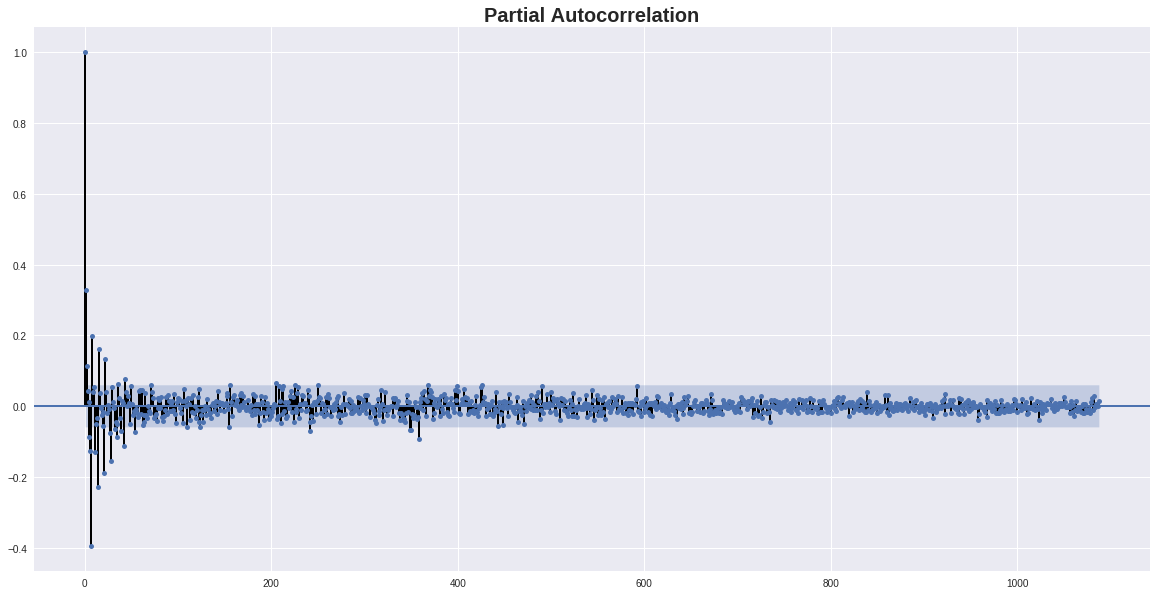

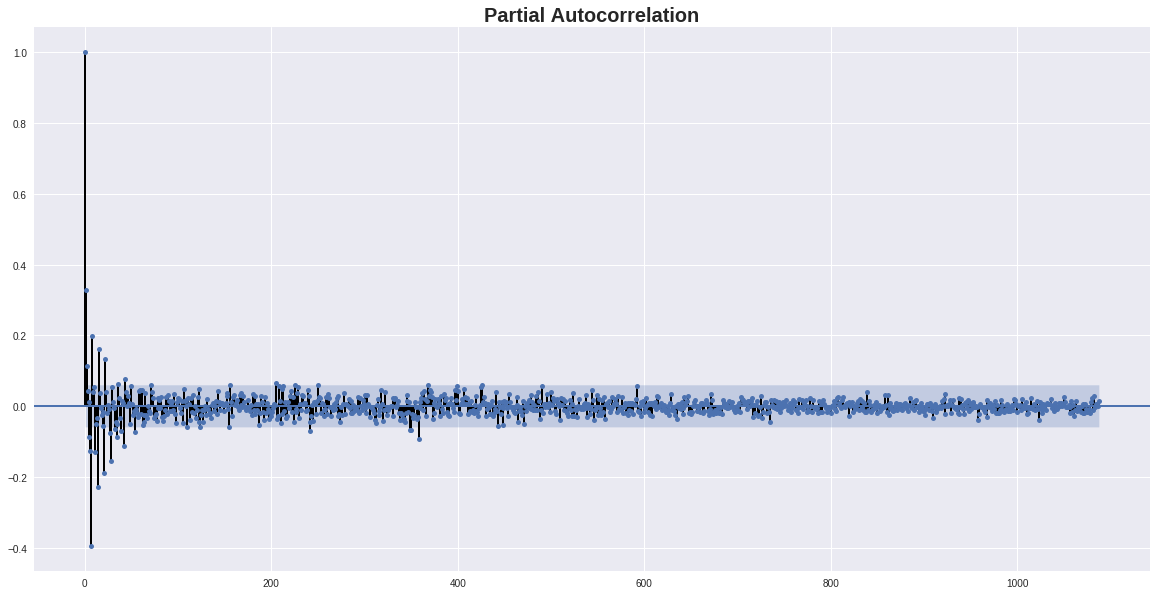

In [26]:
plot_pacf(per_day['Seasonal First Difference'].dropna())

# Observations